Found CSV files:
 - data_dictionary.csv
 - train.csv
 - test.csv
 - sample_submission.csv

Exploring data_dictionary dataset:
Shape: (59, 4)

First 5 rows:
           variable                                        description  \
0         dri_score                         Refined disease risk index   
1     psych_disturb                            Psychiatric disturbance   
2        cyto_score                                  Cytogenetic score   
3          diabetes                                           Diabetes   
4  hla_match_c_high  Recipient / 1st donor allele level (high resol...   

          type                                             values  
0  Categorical  ['Intermediate' 'High' 'N/A - non-malignant in...  
1  Categorical                        ['Yes' 'No' nan 'Not done']  
2  Categorical  ['Intermediate' 'Favorable' 'Poor' 'TBD' nan '...  
3  Categorical                        ['No' 'Yes' nan 'Not done']  
4    Numerical                                             

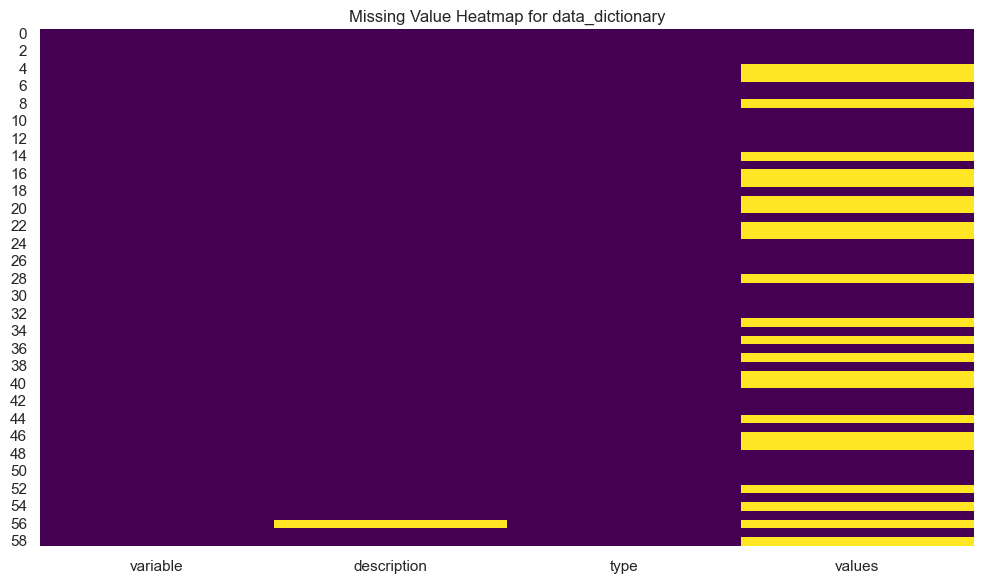


Exploring train dataset:
Shape: (28800, 60)

First 5 rows:
   ID                       dri_score psych_disturb    cyto_score diabetes  \
0   0  N/A - non-malignant indication            No           NaN       No   
1   1                    Intermediate            No  Intermediate       No   
2   2  N/A - non-malignant indication            No           NaN       No   
3   3                            High            No  Intermediate       No   
4   4                            High            No           NaN       No   

   hla_match_c_high  hla_high_res_8          tbi_status arrhythmia  \
0               NaN             NaN              No TBI         No   
1               2.0             8.0  TBI +- Other, >cGy         No   
2               2.0             8.0              No TBI         No   
3               2.0             8.0              No TBI         No   
4               2.0             8.0              No TBI         No   

   hla_low_res_6  ...          tce_div_match donor

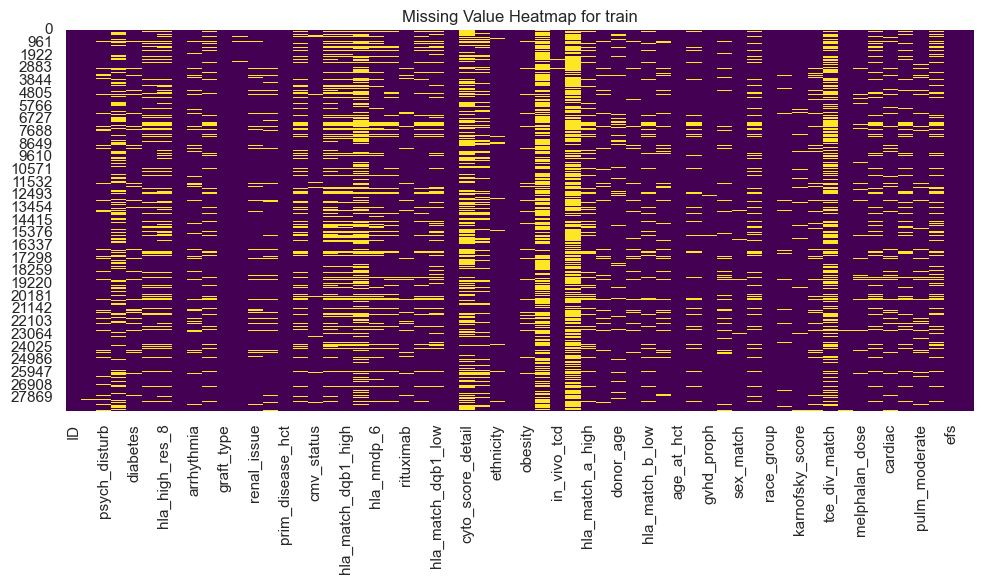

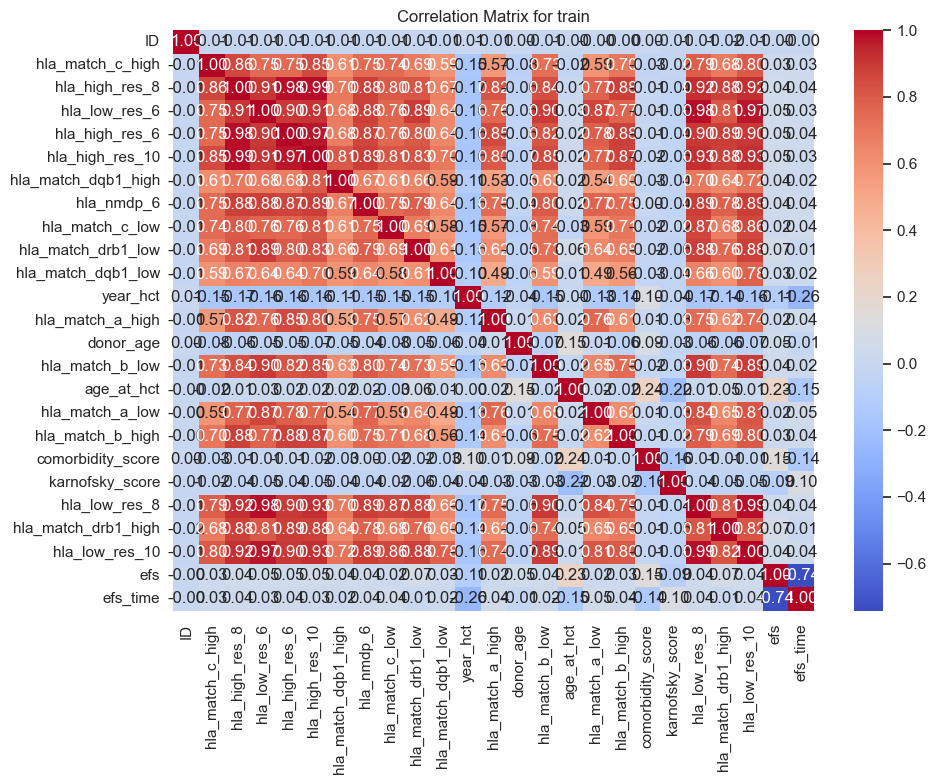

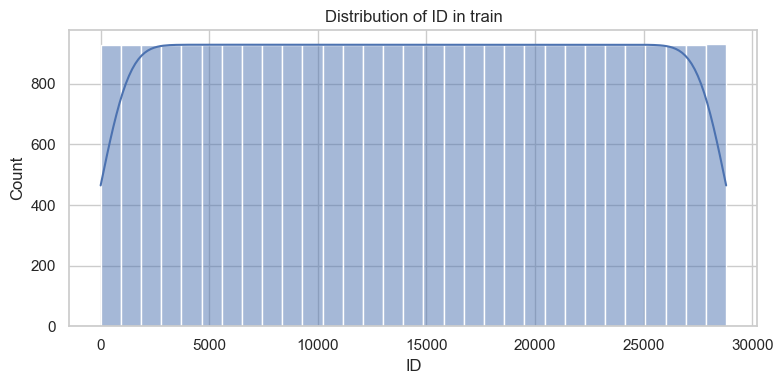

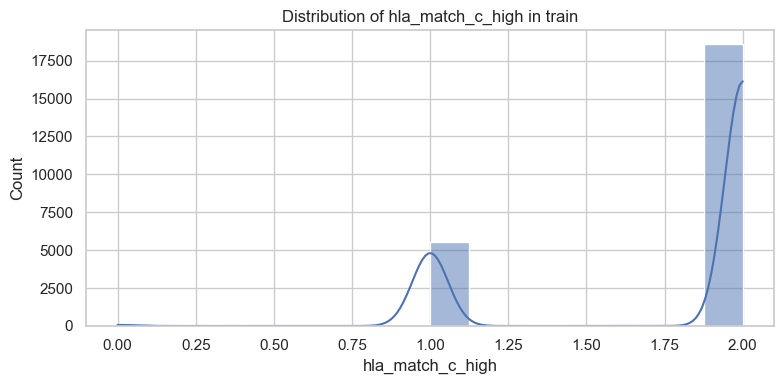

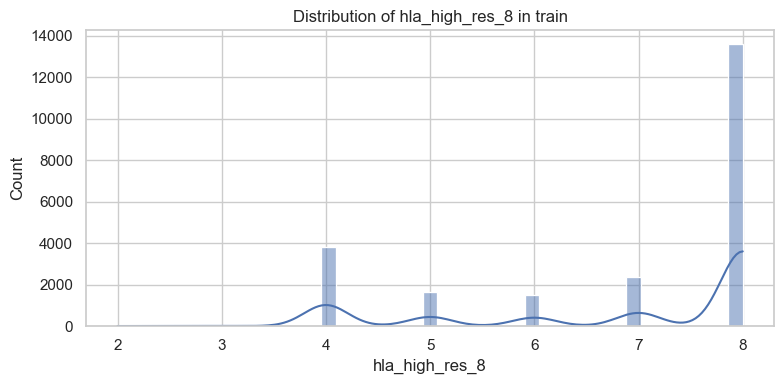

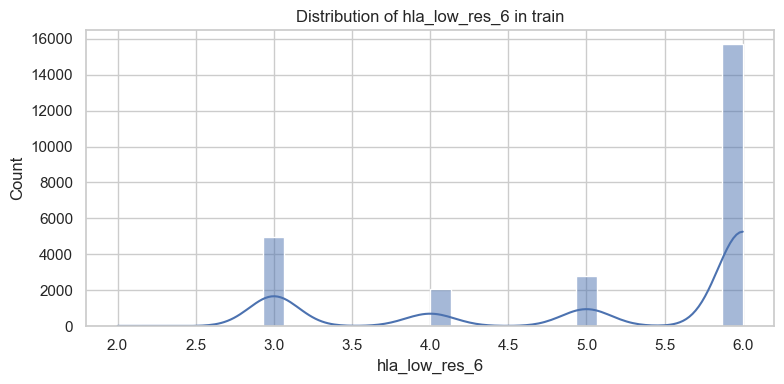

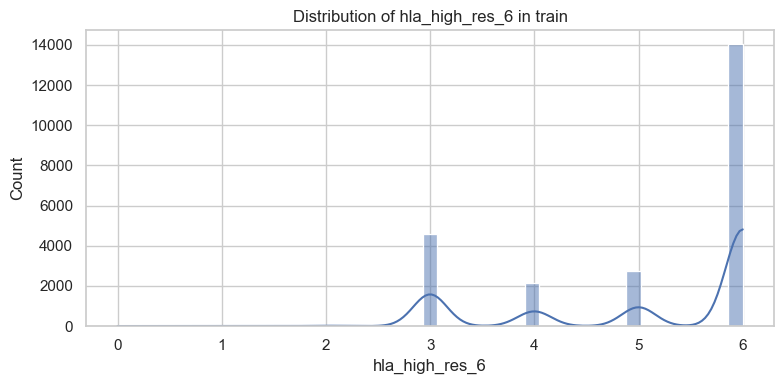

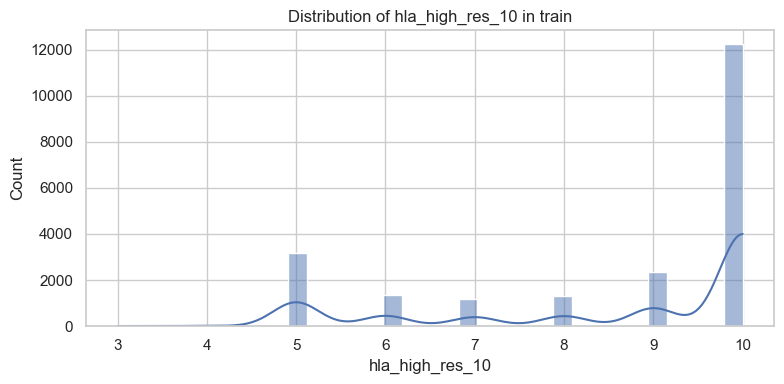

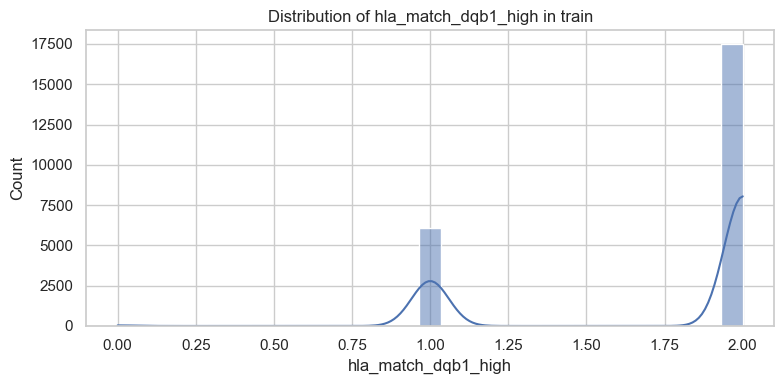

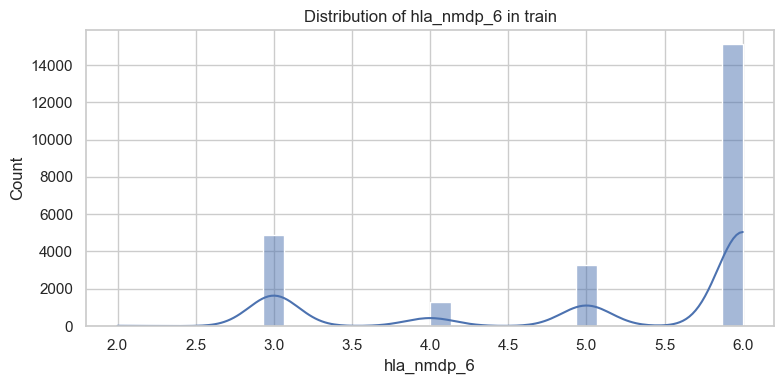

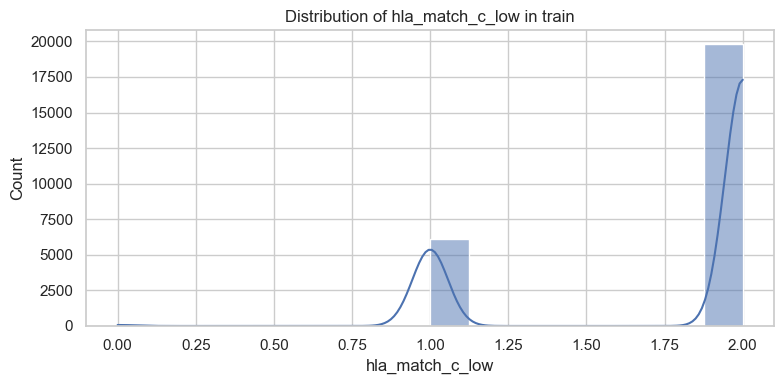

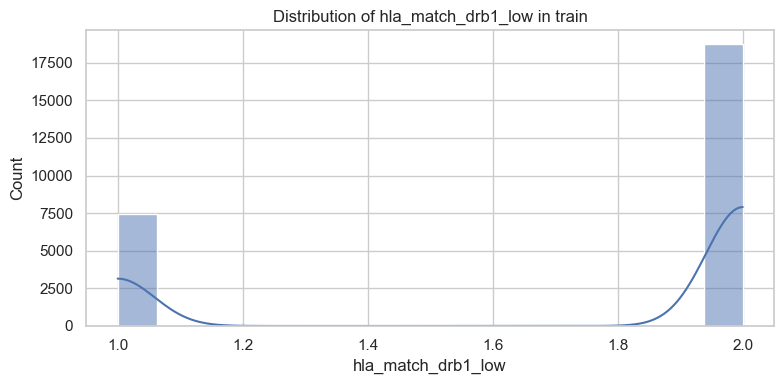

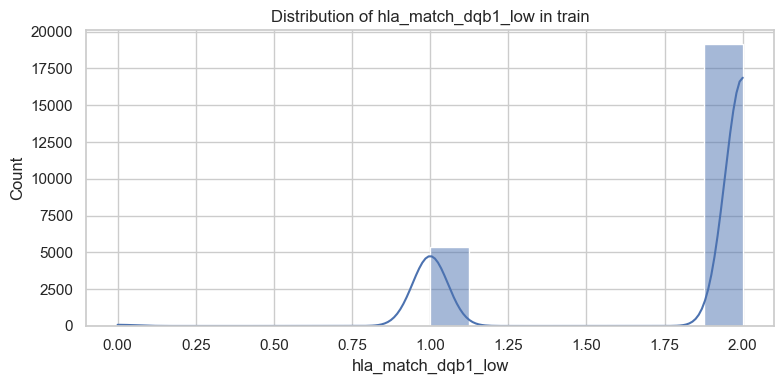

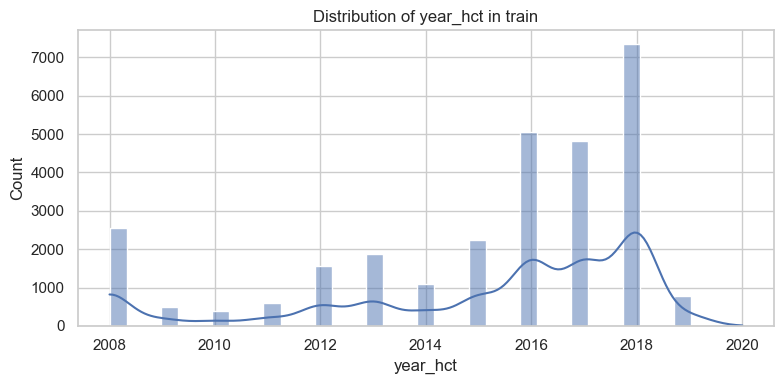

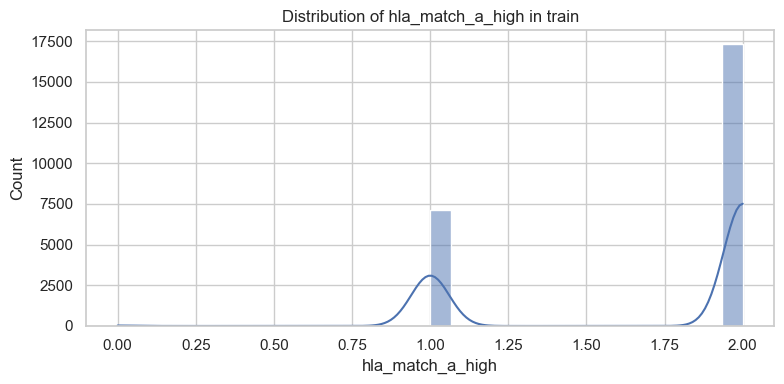

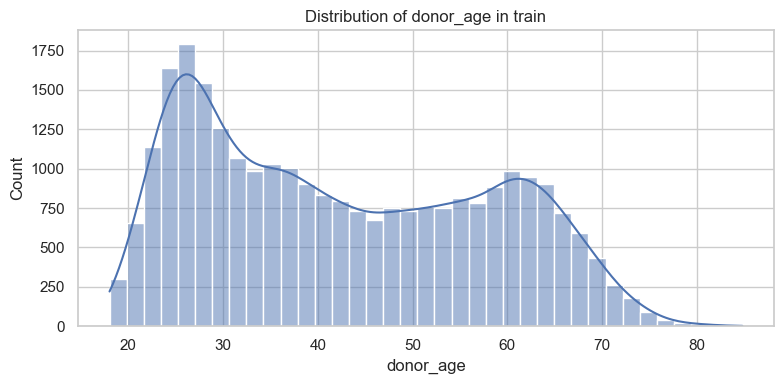

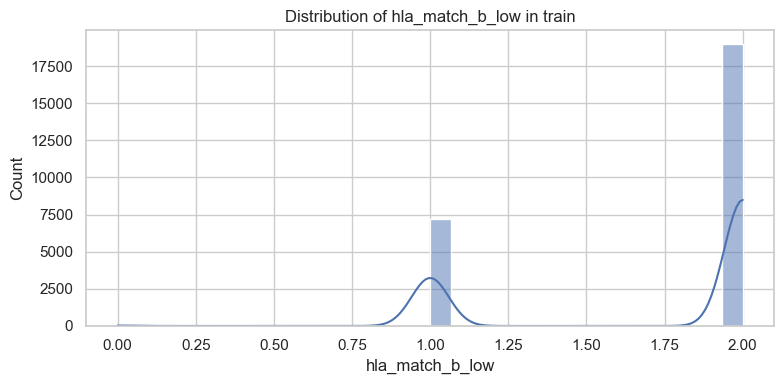

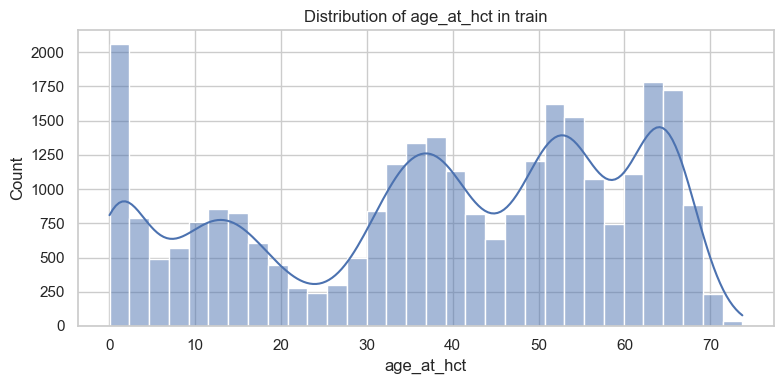

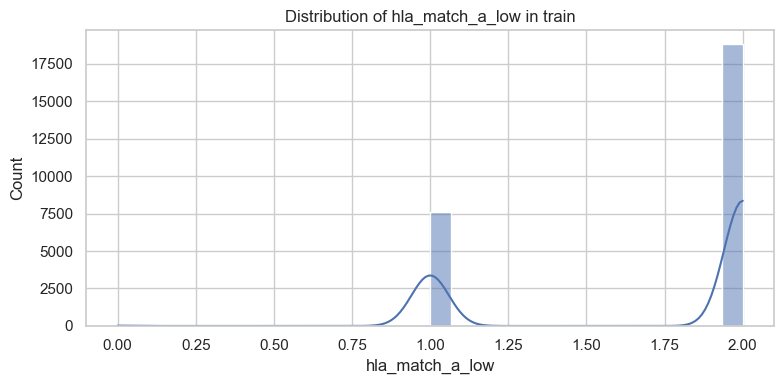

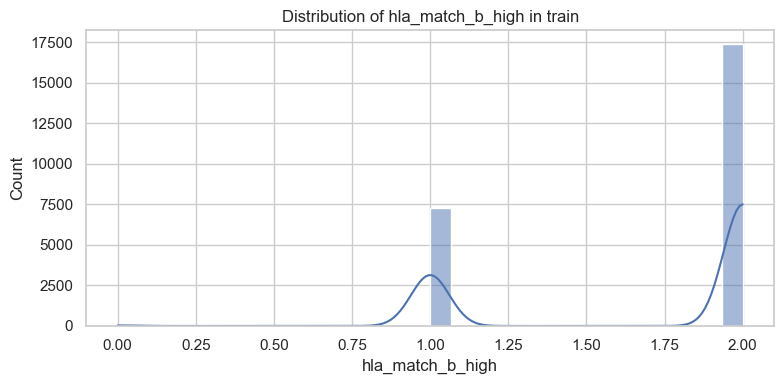

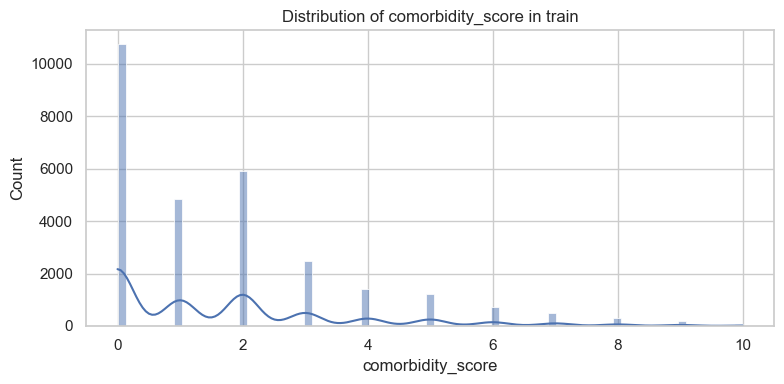

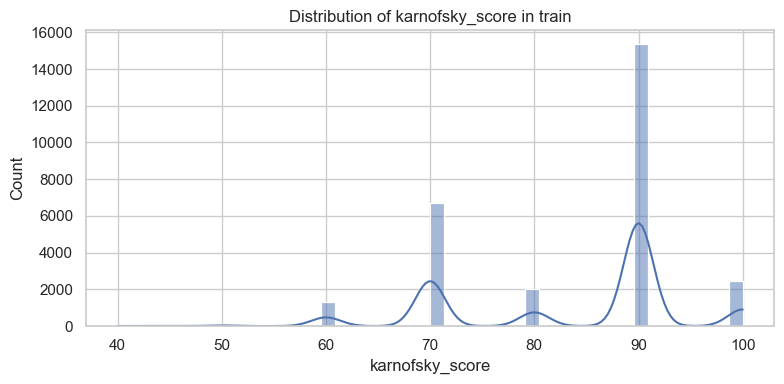

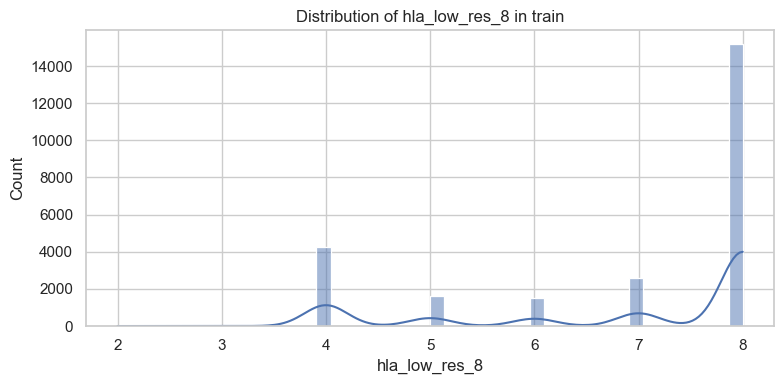

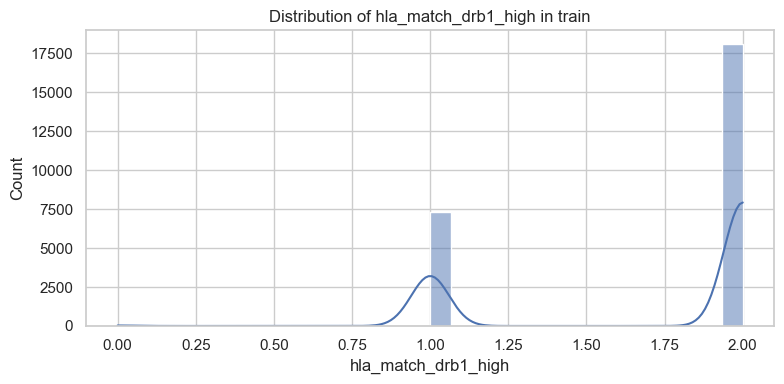

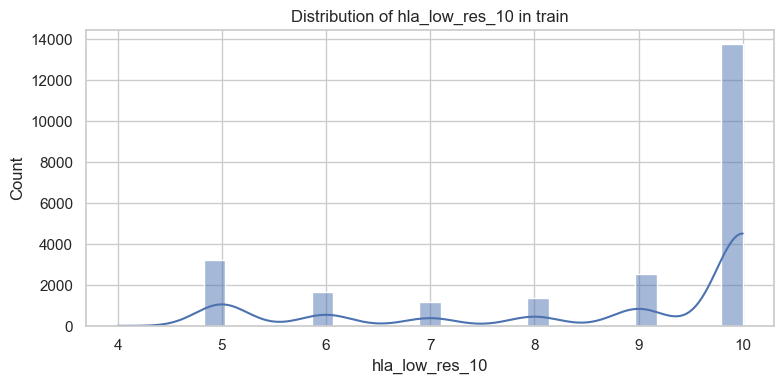

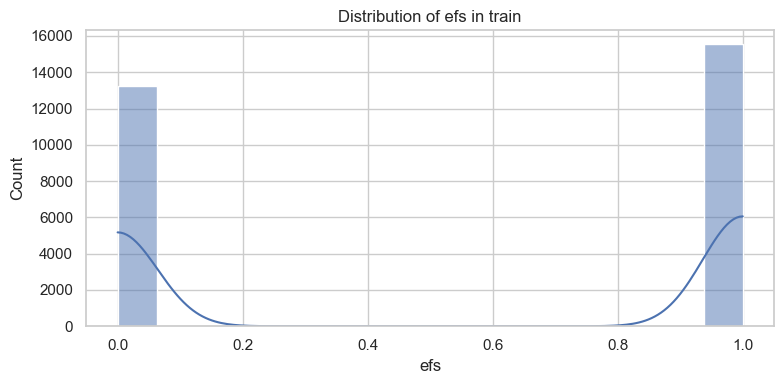

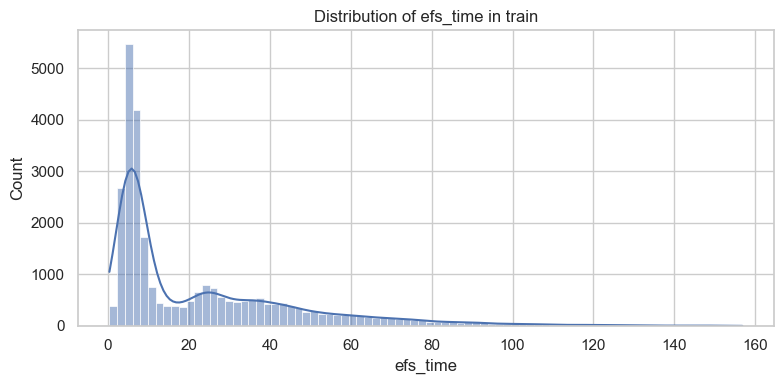


Exploring test dataset:
Shape: (3, 58)

First 5 rows:
      ID                       dri_score psych_disturb    cyto_score diabetes  \
0  28800  N/A - non-malignant indication            No           NaN       No   
1  28801                    Intermediate            No  Intermediate       No   
2  28802  N/A - non-malignant indication            No           NaN       No   

   hla_match_c_high  hla_high_res_8          tbi_status arrhythmia  \
0               NaN             NaN              No TBI         No   
1               2.0             8.0  TBI +- Other, >cGy         No   
2               2.0             8.0              No TBI         No   

   hla_low_res_6  ... karnofsky_score hepatic_mild          tce_div_match  \
0            6.0  ...            90.0           No                    NaN   
1            6.0  ...            90.0           No  Permissive mismatched   
2            6.0  ...            90.0           No  Permissive mismatched   

  donor_related      melphalan

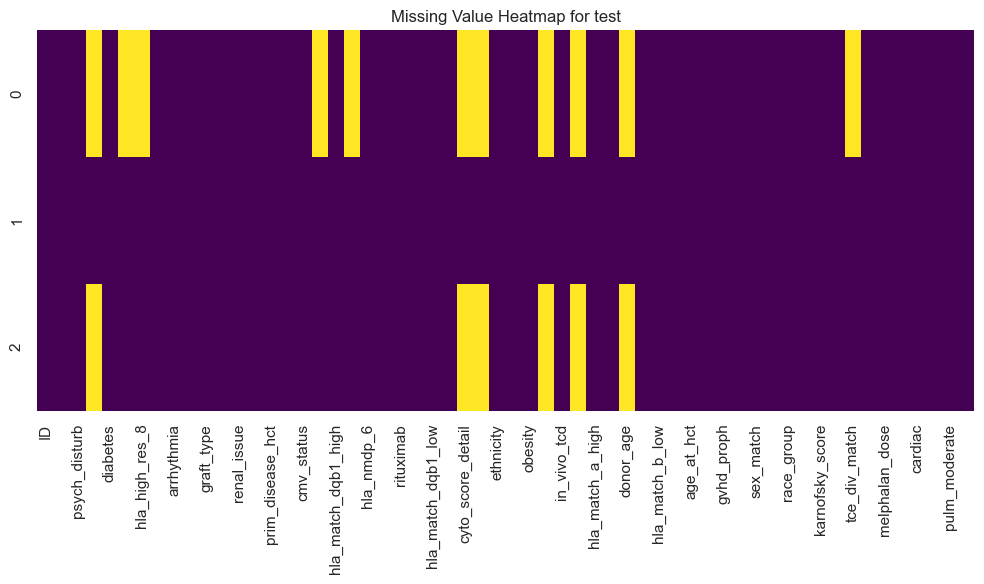

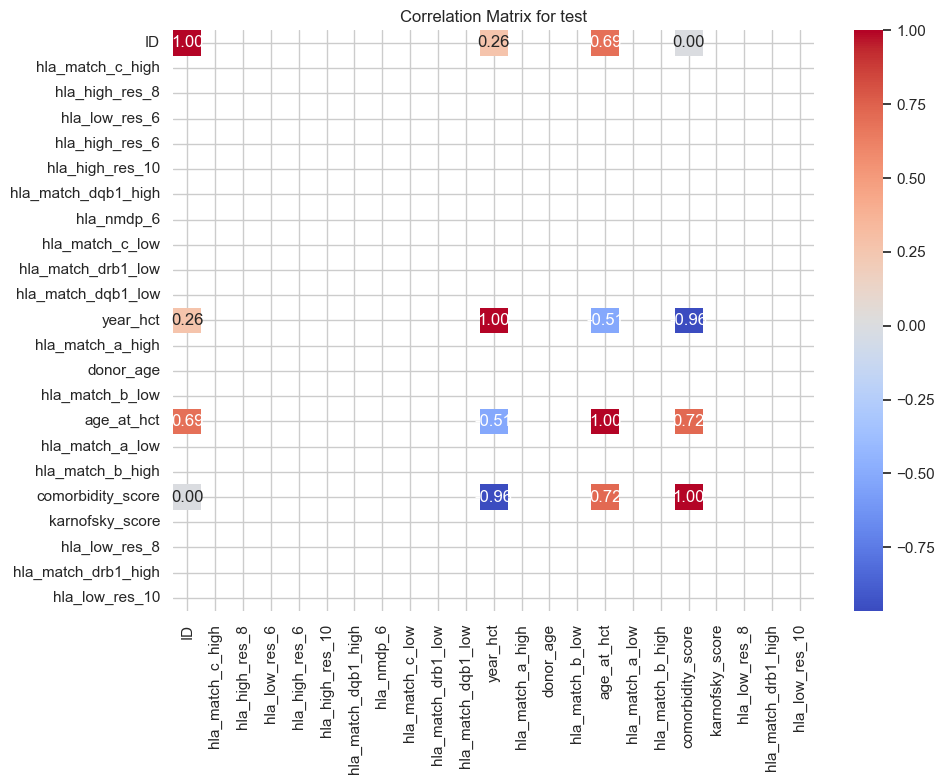

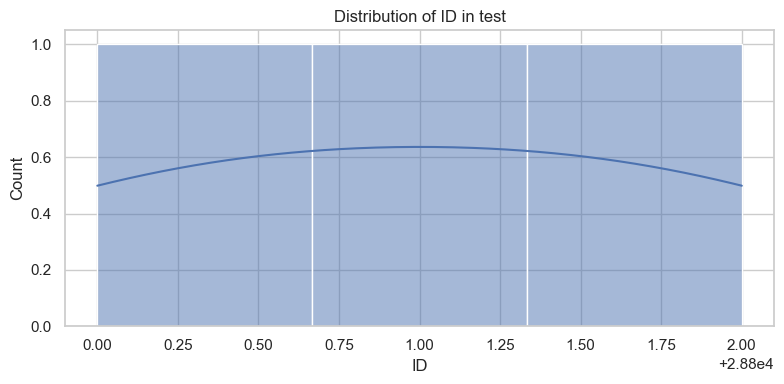

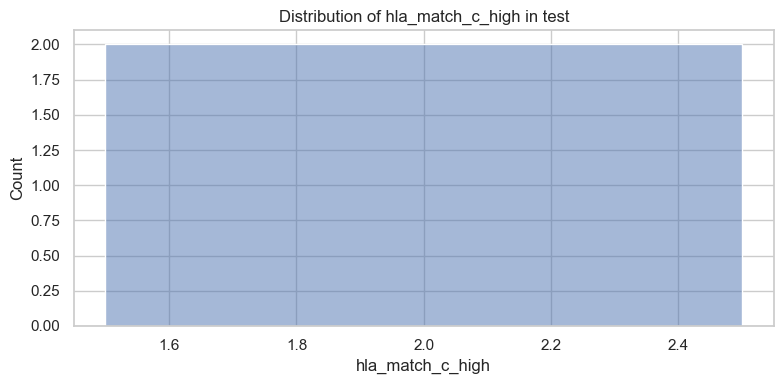

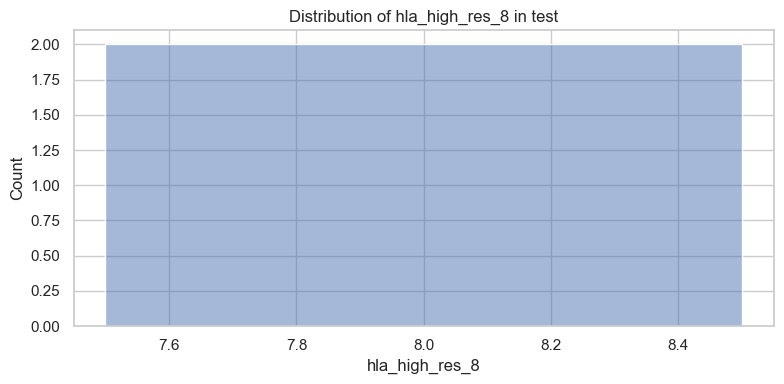

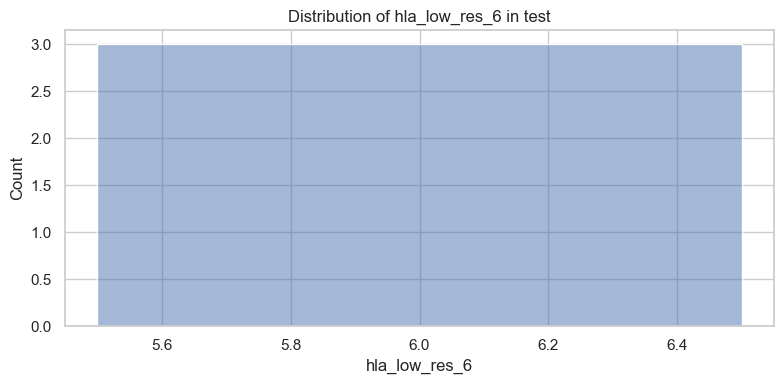

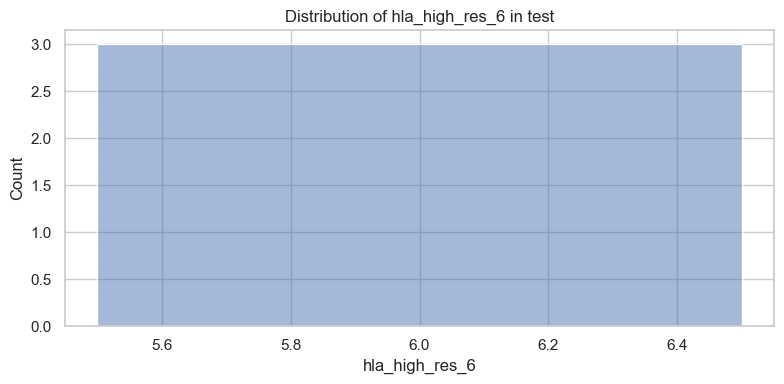

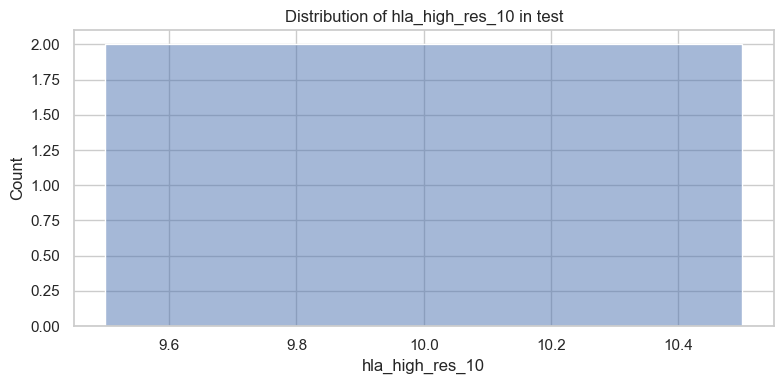

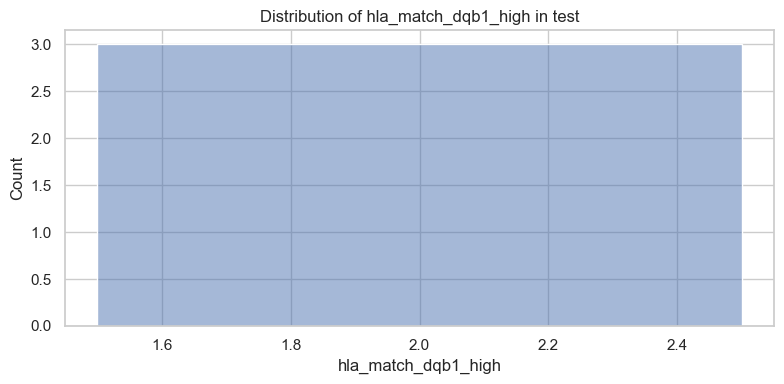

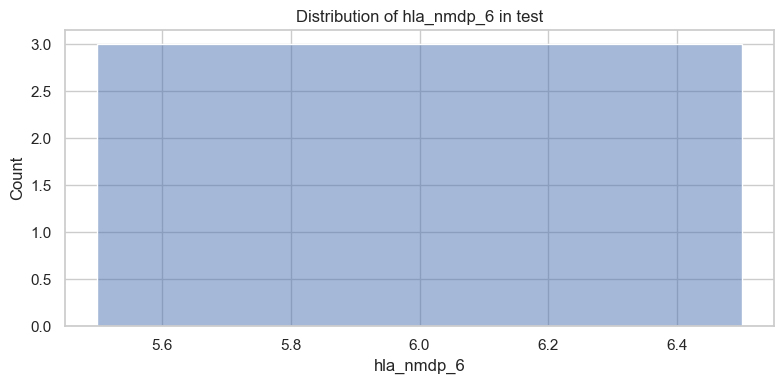

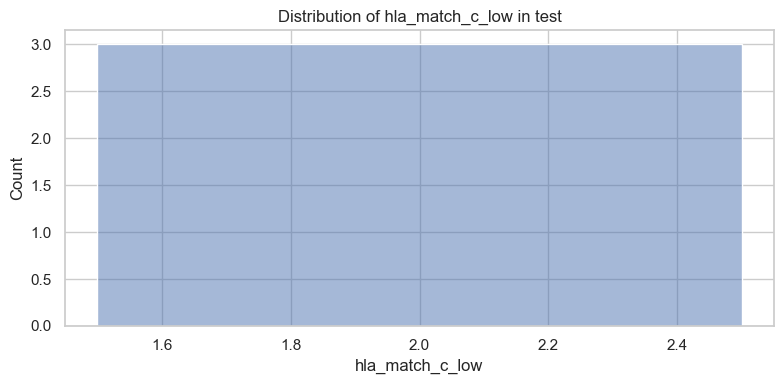

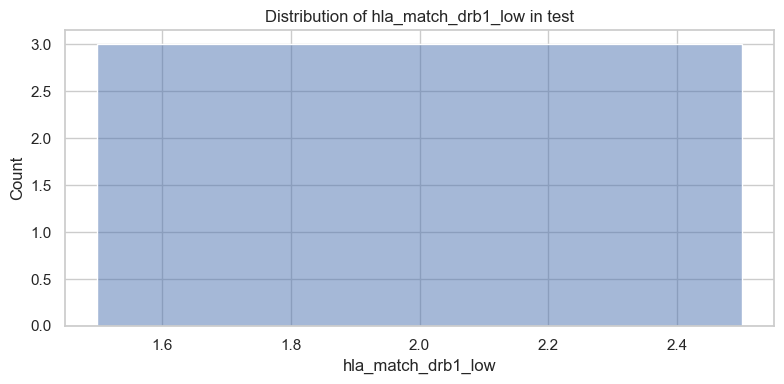

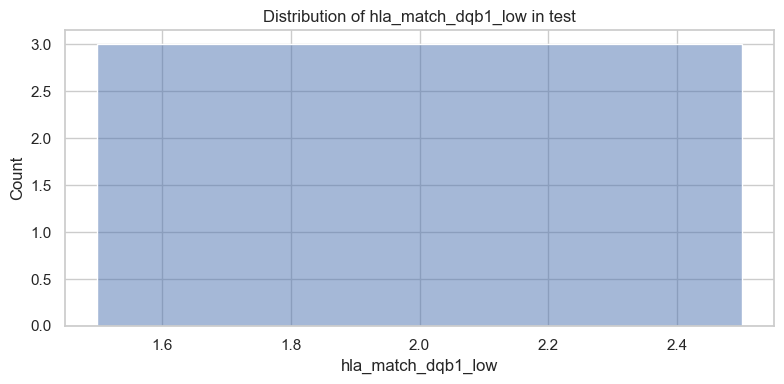

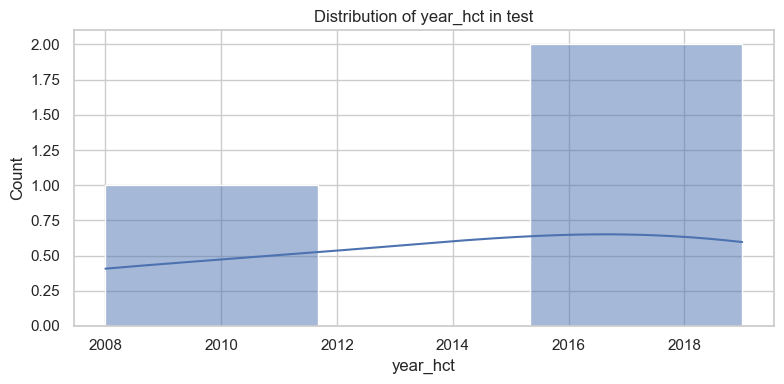

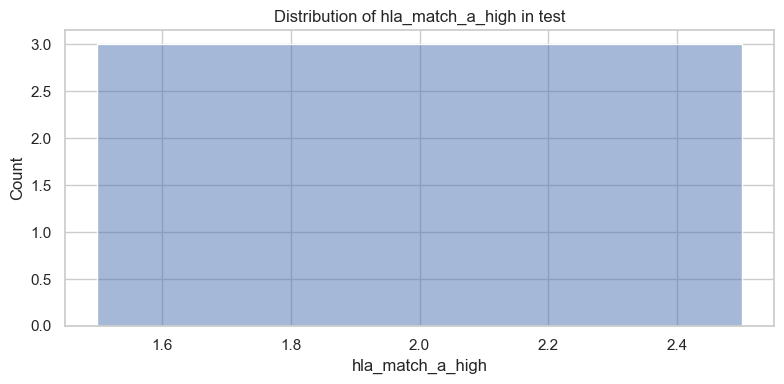

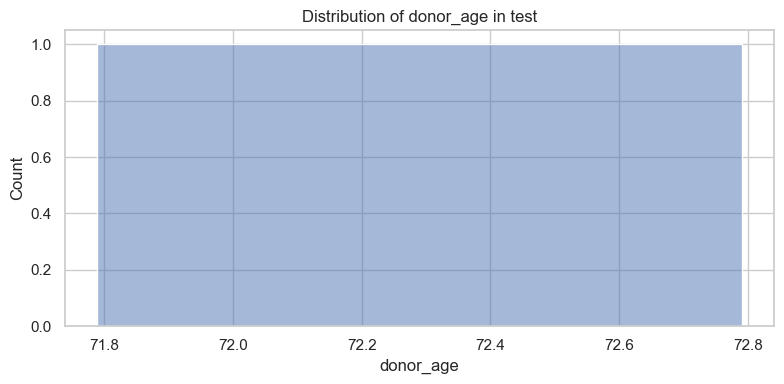

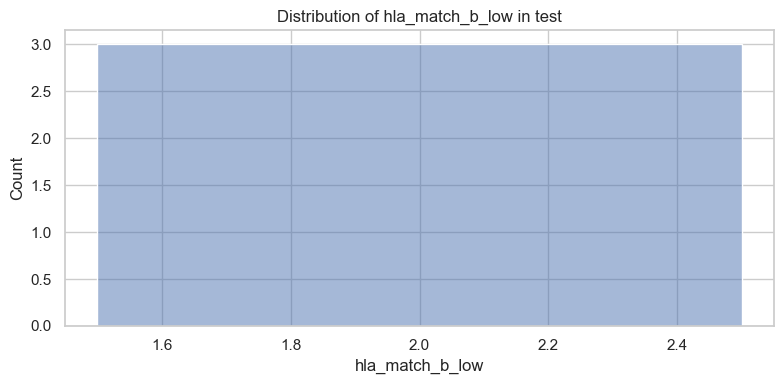

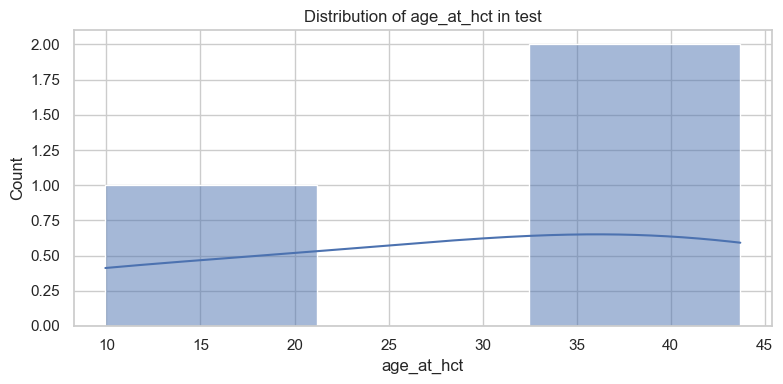

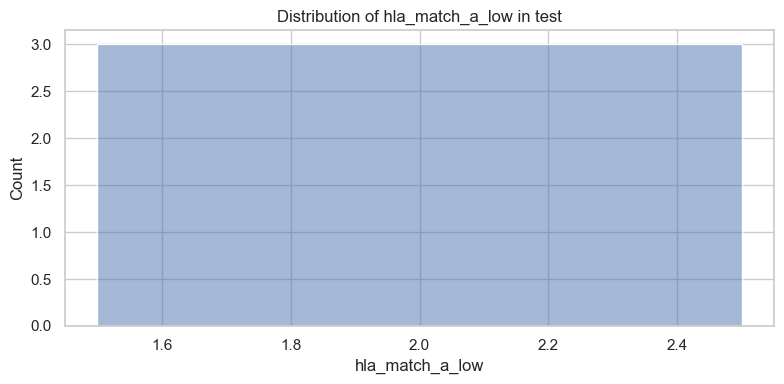

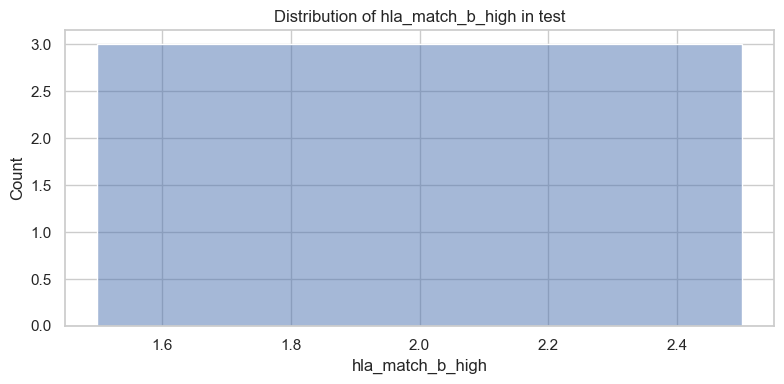

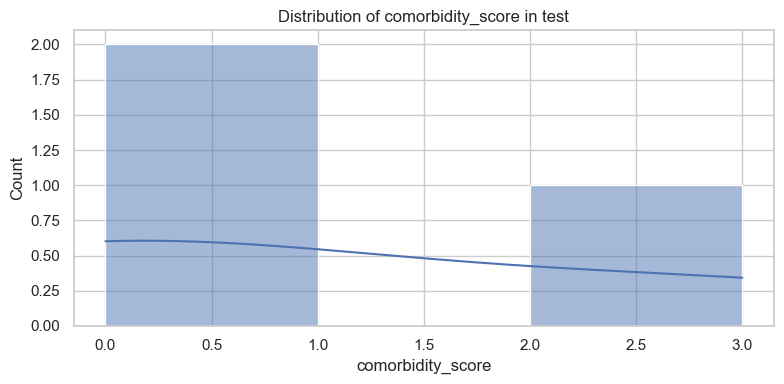

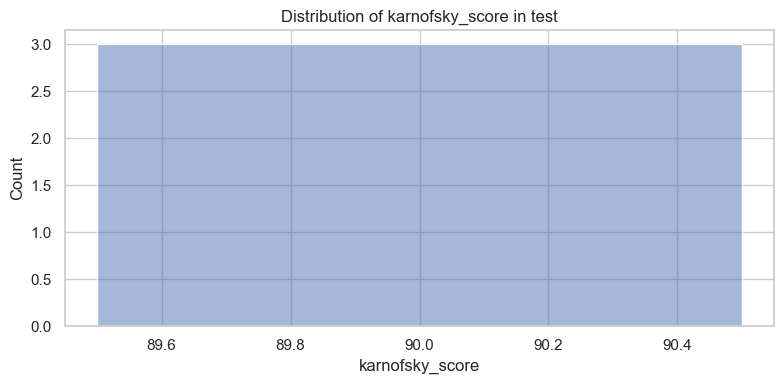

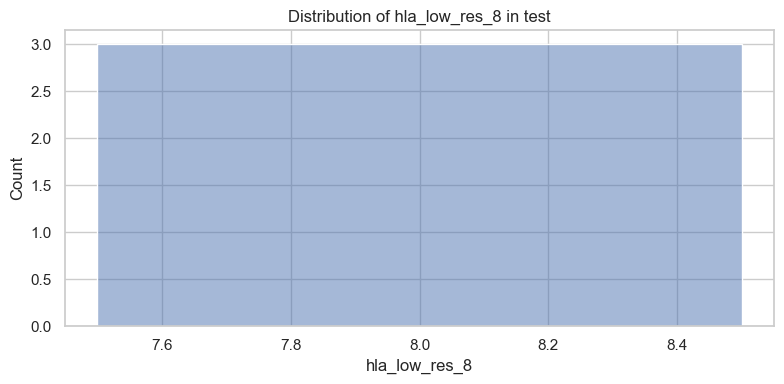

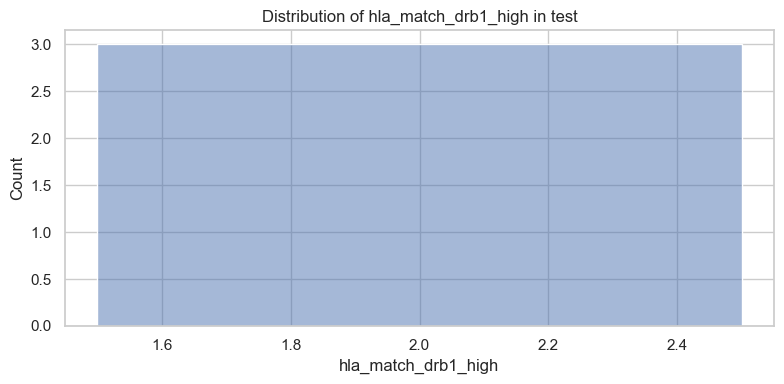

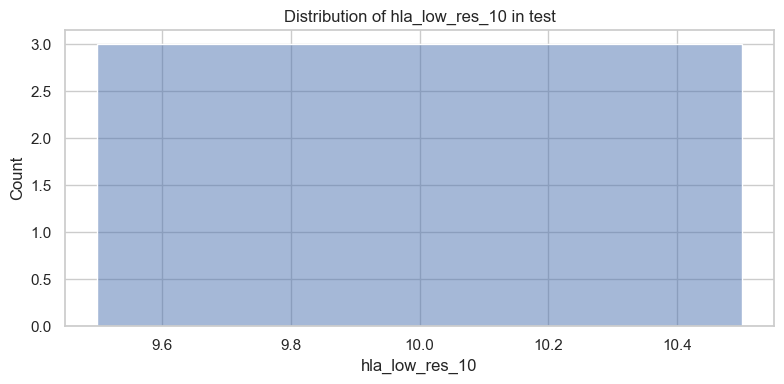


Exploring sample_submission dataset:
Shape: (3, 2)

First 5 rows:
      ID  prediction
0  28800         0.5
1  28801         0.5
2  28802         0.5

Summary statistics:
            ID  prediction
count      3.0         3.0
mean   28801.0         0.5
std        1.0         0.0
min    28800.0         0.5
25%    28800.5         0.5
50%    28801.0         0.5
75%    28801.5         0.5
max    28802.0         0.5

Missing values per column:
Series([], dtype: int64)


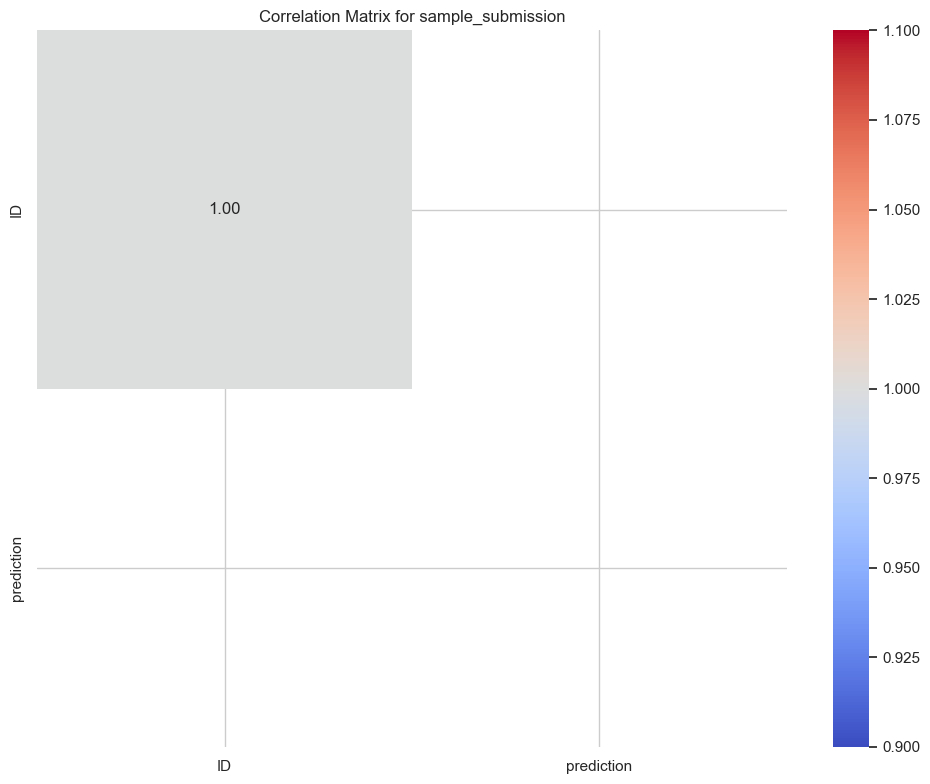

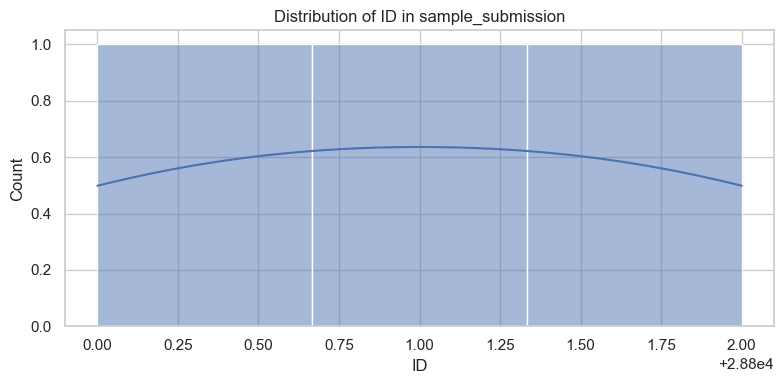

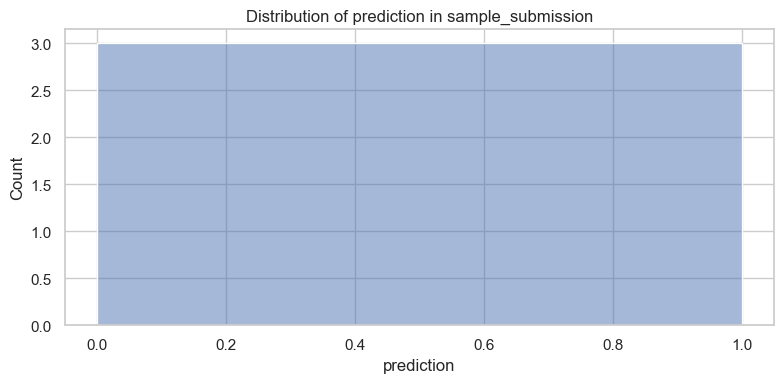

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

sns.set(style="whitegrid")

def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print(f"Could not read {file_path}: {e}")
        return None

def eda_for_dataframe(df, name):
    print(f"\nExploring {name} dataset:")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nSummary statistics:")
    print(df.describe(include='all'))
    
    # Check for missing values and plot heatmap if any found
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    print("\nMissing values per column:")
    print(missing)
    
    if missing.sum() > 0:
        plt.figure(figsize=(10, 6))
        sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
        plt.title(f'Missing Value Heatmap for {name}')
        plt.tight_layout()
        plt.savefig(f"{name}_missing_heatmap.png")
        plt.show()
    
    # Correlation matrix for numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 8))
        corr = df[numeric_cols].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'Correlation Matrix for {name}')
        plt.tight_layout()
        plt.savefig(f"{name}_correlation_matrix.png")
        plt.show()
    
    # Distribution plots for numeric columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col} in {name}')
        plt.tight_layout()
        plt.savefig(f"{name}_{col}_distribution.png")
        plt.show()

def main():
    # List all CSV files in the current folder
    csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]
    
    if not csv_files:
        print("No CSV files were found in the directory.")
        return
    
    print("Found CSV files:")
    for file in csv_files:
        print(f" - {file}")

    for file in csv_files:
        df = load_data(file)
        if df is not None:
            eda_for_dataframe(df, file.split('.')[0])
        else:
            print(f"Skipping {file} due to read error.")

if __name__ == "__main__":
    main()

In [21]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df['efs']

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
28795    0.0
28796    1.0
28797    0.0
28798    0.0
28799    0.0
Name: efs, Length: 28800, dtype: float64

In [14]:
train_df['efs_time'].describe()

count    28800.000000
mean        23.237678
std         24.799748
min          0.333000
25%          5.619750
50%          9.796500
75%         35.100000
max        156.819000
Name: efs_time, dtype: float64

In [18]:
import pandas as pd
import pandas.api.types
row_id_column_name = "id"
y_pred = {'prediction': {0: 1.0, 1: 0.0, 2: 1.0}}
y_pred = pd.DataFrame(y_pred)
y_pred.insert(0, row_id_column_name, range(len(y_pred)))
y_true = { 'efs': {0: 1.0, 1: 0.0, 2: 0.0}, 'efs_time': {0: 25.1234,1: 250.1234,2: 2500.1234}, 'race_group': {0: 'race_group_1', 1: 'race_group_1', 2: 'race_group_1'}}
y_true = pd.DataFrame(y_true)
y_true.insert(0, row_id_column_name, range(len(y_true)))

In [23]:
solution = y_true
submission = y_pred

event_label = 'efs'
interval_label = 'efs_time'
prediction_label = 'prediction'
# Merging solution and submission dfs on ID
merged_df = pd.concat([solution, submission], axis=1)
merged_df.reset_index(inplace=True)
merged_df_race_dict = dict(merged_df.groupby(['race_group']).groups)
merged_df

,index,id,efs,efs_time,race_group,id,prediction
0,0,0,1.0,25.1234,race_group_1,0,1.0
1,1,1,0.0,250.1234,race_group_1,1,0.0
2,2,2,0.0,2500.1234,race_group_1,2,1.0


In [24]:
merged_df_race_dict

{'race_group_1': Index([0, 1, 2], dtype='int64')}

Okay, I will provide a detailed, step-by-step solution to maximize your chances of winning the CIBMTR - Equity in post-HCT Survival Predictions competition on Kaggle.

**I. Understanding the Competition & Data**

1.  **Competition Goal:** Predict post-HCT survival while addressing potential inequities. The primary metric is the C-index (concordance index), a measure of ranking accuracy for survival times.
2.  **Data Overview:**
    *   

train.csv

: Training data with features and survival outcomes (`efs_time`, `efs`).
    *   

test.csv

: Test data for which you'll predict survival.
    *   

sample_submission.csv

:  Format for your submission.
    *   Features: Patient demographics, disease characteristics, transplant details, and potentially socioeconomic factors.

**II. Step-by-Step Solution**

**Phase 1: Exploratory Data Analysis (EDA) & Preprocessing**

1.  **Load Data:**



In [5]:
# Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")



2.  **Initial Data Inspection:**



In [6]:
# Python
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print(train_df.head())
print(train_df.info()) # Check data types and missing values
print(train_df.describe(include='all')) # Summary statistics

Train shape: (28800, 60)
Test shape: (3, 58)
   ID                       dri_score psych_disturb    cyto_score diabetes  \
0   0  N/A - non-malignant indication            No           NaN       No   
1   1                    Intermediate            No  Intermediate       No   
2   2  N/A - non-malignant indication            No           NaN       No   
3   3                            High            No  Intermediate       No   
4   4                            High            No           NaN       No   

   hla_match_c_high  hla_high_res_8          tbi_status arrhythmia  \
0               NaN             NaN              No TBI         No   
1               2.0             8.0  TBI +- Other, >cGy         No   
2               2.0             8.0              No TBI         No   
3               2.0             8.0              No TBI         No   
4               2.0             8.0              No TBI         No   

   hla_low_res_6  ...          tce_div_match donor_related  \
0  



3.  **Target Variable Analysis (`efs_time`, `efs`):**



efs
1.0    0.539306
0.0    0.460694
Name: proportion, dtype: float64


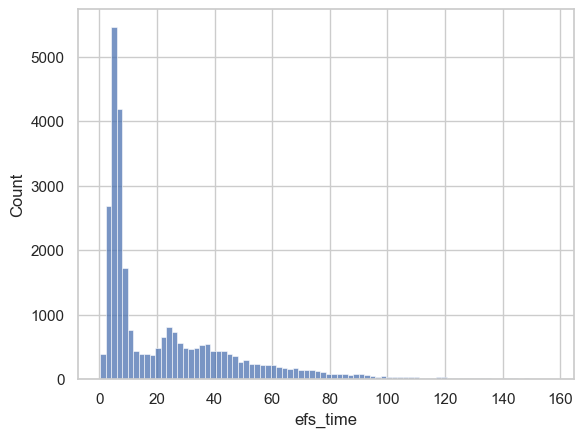

In [7]:
# Python
print(train_df['efs'].value_counts(normalize=True)) # Class distribution
sns.histplot(train_df['efs_time'])
plt.show()



4.  **Missing Value Analysis:**



Missing values:
 tce_match                 18996
mrd_hct                   16597
cyto_score_detail         11923
tce_div_match             11396
tce_imm_match             11133
cyto_score                 8068
hla_high_res_10            7163
hla_high_res_8             5829
hla_high_res_6             5284
hla_match_dqb1_high        5199
hla_low_res_10             5064
conditioning_intensity     4789
hla_match_c_high           4620
hla_match_a_high           4301
hla_nmdp_6                 4197
hla_match_dqb1_low         4194
hla_match_b_high           4088
hla_low_res_8              3653
hla_match_drb1_high        3352
hla_low_res_6              3270
hla_match_c_low            2800
hla_match_drb1_low         2643
hla_match_b_low            2565
cardiac                    2542
peptic_ulcer               2419
hla_match_a_low            2390
arrhythmia                 2202
rheum_issue                2183
rituximab                  2148
pulm_severe                2135
diabetes               

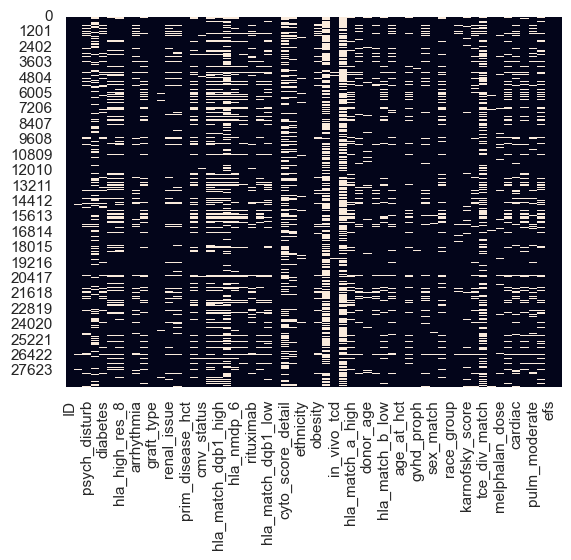

In [8]:
# Python
missing_counts = train_df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_counts[missing_counts > 0])

# Visualize missingness (optional)
sns.heatmap(train_df.isnull(), cbar=False)
plt.show()



5.  **Feature Exploration:**



In [ ]:
# Python
# Numerical features
numerical_features = train_df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_features:
    plt.figure()
    sns.histplot(train_df[col].dropna(), kde=True)
    plt.title(col)
    plt.show()

# Categorical features
categorical_features = train_df.select_dtypes(exclude=np.number).columns.tolist()
for col in categorical_features:
    plt.figure()
    sns.countplot(data=train_df, x=col)
    plt.title(col)
    plt.xticks(rotation=45, ha='right')
    plt.show()



6.  **Relationships between Features and Target:**



In [ ]:
# Python
# Example: Numerical vs. efs_time
for col in numerical_features:
    plt.figure()
    sns.scatterplot(data=train_df, x=col, y='efs_time', hue='efs')
    plt.title(f'{col} vs. efs_time')
    plt.show()

# Example: Categorical vs. efs
for col in categorical_features:
    plt.figure()
    sns.countplot(data=train_df, x=col, hue='efs')
    plt.title(f'{col} vs. efs')
    plt.xticks(rotation=45, ha='right')
    plt.show()



7.  **Correlation Analysis (Numerical Features):**



In [ ]:
# Python
corr = train_df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()



8.  **Address Data Leakage:** Be extremely careful about any features that might leak information from the future.

**Phase 2: Feature Engineering & Data Preprocessing**

1.  **Handle Missing Values:**
    *   **Imputation:** Use `SimpleImputer` (mean, median, most frequent) or more advanced methods (`KNNImputer`, `IterativeImputer`). Consider using different strategies based on the feature.
    *   **Create Missing Value Indicators:** Add binary columns indicating whether a value was originally missing.



In [ ]:
# Python
from sklearn.impute import SimpleImputer

# Example: Impute missing numerical values with the median
num_imputer = SimpleImputer(strategy='median')
train_df[numerical_features] = num_imputer.fit_transform(train_df[numerical_features])
test_df[numerical_features] = num_imputer.transform(test_df[numerical_features]) # Use the SAME imputer trained on the training data



2.  **Encode Categorical Variables:**
    *   **One-Hot Encoding:** Use `pd.get_dummies` or `OneHotEncoder`. Handle rare categories carefully (group them into an "Other" category).
    *   **Target Encoding:**  Encode categories based on the target variable. Be careful of overfitting; use cross-validation.



In [ ]:
# Python
# Example: One-Hot Encoding
train_df = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_features, drop_first=True)

# Align columns between train and test (handle new categories in test)
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)
missing_in_test = list(train_cols - test_cols)
missing_in_train = list(test_cols - train_cols)

for col in missing_in_test:
    if col != 'efs' and col != 'efs_time':
        test_df[col] = 0

for col in missing_in_train:
    if col != 'efs' and col != 'efs_time':
        train_df[col] = 0

train_df, test_df = train_df.align(test_df, join='inner', axis=1)



3.  **Feature Scaling:**
    *   `StandardScaler`: Standardize features to have zero mean and unit variance.
    *   `MinMaxScaler`: Scale features to a range between 0 and 1.



In [ ]:
# Python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = train_df.select_dtypes(include=np.number).columns.tolist()
X_train = train_df.drop(['efs', 'efs_time'], axis=1)
X_test = test_df

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])



4.  **Create Survival Event Indicator:**



In [ ]:
# Python
y_train = train_df['efs_time']
event_train = (train_df['efs'] == 'Event').astype(int)



**Phase 3: Model Building & Training**

1.  **Choose a Survival Model:**
    *   **Cox Proportional Hazards:** A classic and interpretable model.
    *   **Random Survival Forest:** An ensemble method that can handle non-linear relationships.
    *   **Gradient Boosting Survival Analysis (GBSA):**  Potentially the most powerful, but requires careful tuning.  Libraries include `scikit-survival` and `lifelines`.

2.  **Cox Proportional Hazards (Example):**



In [ ]:
# Python
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(X_train, duration_col=y_train, event_col=event_train)
cph.print_summary()



3.  **Random Survival Forest (Example):**



In [ ]:
# Python
from sksurv.ensemble import RandomSurvivalForest

rsf = RandomSurvivalForest(n_estimators=100, random_state=42)
rsf.fit(X_train, np.array(list(zip(event_train, y_train)),
                              dtype=[('bool', bool), ('float', float)]))



4.  **Gradient Boosting Survival Analysis (Example):**



In [ ]:
# Python
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

gbsa = GradientBoostingSurvivalAnalysis(n_estimators=100, random_state=42)
gbsa.fit(X_train, np.array(list(zip(event_train, y_train)),
                              dtype=[('bool', bool), ('float', float)]))



**Phase 4: Model Evaluation & Hyperparameter Tuning**

1.  **Concordance Index (C-index):**  Use the C-index as your primary evaluation metric.



In [ ]:
# Python
from lifelines.utils import concordance_index
from sksurv.metrics import concordance_index_censored

# Cox Model
predicted_hazard_ratios = cph.predict_partial_hazard(X_train)
c_index_cox = concordance_index(y_train, -predicted_hazard_ratios, event_train)
print("C-index (Cox):", c_index_cox)

# RSF Model
risk_scores = rsf.predict(X_train)
c_index_rsf = concordance_index_censored(event_train, y_train, risk_scores)[0]
print("C-index (RSF):", c_index_rsf)

# GBSA Model
risk_scores_gbsa = gbsa.predict(X_train)
c_index_gbsa = concordance_index_censored(event_train, y_train, risk_scores_gbsa)[0]
print("C-index (GBSA):", c_index_gbsa)



2.  **Cross-Validation:** Use stratified K-fold cross-validation to get a more robust estimate of performance.  Consider using `sksurv.model_selection.split.SurvKFold` for survival data.



In [ ]:
# Python
from sklearn.model_selection import KFold
from sksurv.metrics import concordance_index_censored
from sksurv.model_selection import SurvKFold

# Example with RSF
cv = SurvKFold(n_splits=5, random_state=42, shuffle=True)
c_indices = []

for train_index, test_index in cv.split(X_train, np.array(list(zip(event_train, y_train)),
                              dtype=[('bool', bool), ('float', float)])):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    event_train_fold, event_test_fold = event_train.iloc[train_index], event_train.iloc[test_index]

    rsf.fit(X_train_fold, np.array(list(zip(event_train_fold, y_train_fold)),
                              dtype=[('bool', bool), ('float', float)]))
    risk_scores = rsf.predict(X_test_fold)
    c_index = concordance_index_censored(event_test_fold, y_test_fold, risk_scores)[0]
    c_indices.append(c_index)

print("Cross-validated C-indices:", c_indices)
print("Mean C-index:", np.mean(c_indices))



3.  **Hyperparameter Tuning:** Use `GridSearchCV` or `RandomizedSearchCV` to find the best hyperparameters for your model.



In [ ]:
# Python
from sklearn.model_selection import GridSearchCV

# Example with RSF
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gcv = GridSearchCV(RandomSurvivalForest(random_state=42),
                   param_grid,
                   cv=cv,
                   scoring='neg_log_rank_score') # Or a custom C-index scorer
gcv.fit(X_train, np.array(list(zip(event_train, y_train)),
                              dtype=[('bool', bool), ('float', float)]))

print("Best parameters:", gcv.best_params_)
print("Best C-index:", gcv.best_score_)



**Phase 5: Prediction & Submission**

1.  **Train on Full Training Data:** Train your best model (with tuned hyperparameters) on the entire training dataset.
2.  **Make Predictions on Test Data:**



In [ ]:
# Python
# Cox Model
predicted_hazard_ratios_test = cph.predict_partial_hazard(X_test)

# RSF Model
risk_scores_test = rsf.predict(X_test)

# GBSA Model
risk_scores_test_gbsa = gbsa.predict(X_test)



3.  **Create Submission File:** The submission file should contain a single column of risk scores.



In [ ]:
# Python
submission_df = pd.DataFrame({'risk': risk_scores_test}) # Or predicted_hazard_ratios_test, risk_scores_test_gbsa
submission_df.index.name = 'id'
submission_df.to_csv("submission.csv")



**III. Advanced Techniques**

1.  **Ensemble Methods:** Combine multiple models (e.g., Cox, RSF, GBSA) to improve performance.  Consider weighted averaging or stacking.
2.  **Feature Selection:** Use techniques like recursive feature elimination or feature importance from tree-based models to select the most relevant features.
3.  **Address Equity:**  Carefully examine model performance across different subgroups (e.g., race, socioeconomic status).  Consider techniques like re-weighting or fairness-aware learning to mitigate bias.
4.  **External Data:**  If allowed by the competition rules, consider incorporating external data sources that might provide additional information relevant to post-HCT survival.

**IV. Key Considerations for Success**

*   **Rigorous Validation:**  Use proper cross-validation techniques to avoid overfitting.
*   **Careful Feature Engineering:**  Spend significant time engineering features that capture the underlying relationships in the data.
*   **Model Selection & Tuning:**  Experiment with different models and carefully tune their hyperparameters.
*   **Bias Detection & Mitigation:**  Be mindful of potential biases in the data and model, and take steps to address them.
*   **Stay Updated:**  Follow the competition forums and discussions to learn from other participants.

This comprehensive guide should provide you with a strong foundation for tackling the CIBMTR - Equity in post-HCT Survival Predictions competition. Remember to iterate, experiment, and learn from your results. Good luck!
